# Zadatak 1

In [ ]:
import sys
!{sys.executable} -m pip install pyeasyga

a)

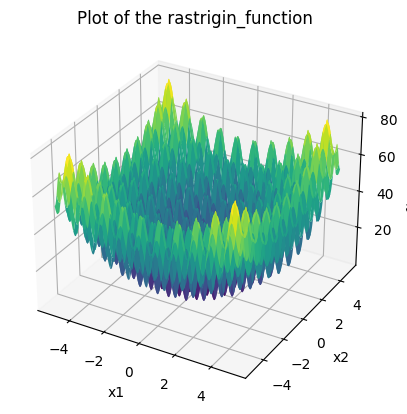

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

def rastrigin_function(x):
    x1 = x[0]
    x2 = x[1]
    return 20 + x1**2 + x2**2 - 10*(np.cos(2*math.pi*x1) + np.cos(2*math.pi*x2))

x1_range = np.linspace(-5.12, 5.12, 400)
x2_range = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = np.zeros_like(X1)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = rastrigin_function([X1[i, j], X2[i, j]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
plt.title('Plot of the rastrigin_function')
plt.show()

Možemo primijetiti da je oblik funkcije karakterističan po mnogim lokalnim minimumima i dubokim udubljenjima. Ovaj oblik sugeriše da je funkcija multimodalna, što znači da ima više od jednog globalnog minimuma.

b) Dužina hromosoma = 26

In [ ]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math

def rastrigin_function(x):
  x1 = x[0]
  x2 = x[1]
  return 20 + x1**2 + x2**2 - 10*(np.cos(2*math.pi*x1) + np.cos(2*math.pi*x2))

RANGE = np.array([[-5.12,5.12], [-5,5]])

ga = GeneticAlgorithm(seed_data = rastrigin_function,
population_size = 30,
generations = 200,
crossover_probability = 0.8,
mutation_probability = 0.02,
elitism = True,
maximise_fitness = False)

BINARY_CHROMOSOME_LENGTH = 26

def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

def mutate(individual):
  mutate_index = random.randrange(len(individual))
  if individual[mutate_index] == 0:
    individual[mutate_index] = 1
  else:
    individual[mutate_index] = 0

ga.mutate_function = mutate

ga.tournament_size = 2

def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
        sum += binary[len(binary)-1-i]*2**(i)
  return sum

def decode(individual):
  x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
  y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
  x_range = RANGE[0]
  y_range = RANGE[1]
  x_min = x_range[0]
  x_max = x_range[1]
  y_min = y_range[0]
  y_max = y_range[1]
  x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
  y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
  return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness

ga.run()

print("Best individual fitness and best individual binary chromosome:")
print(ga.best_individual())

print("Best individual decoded:")
print(decode(ga.best_individual()[1]))

print("Best individual function value:")
print(rastrigin_function(decode(ga.best_individual()[1])))

print("\n---------------------------\n")

print("Last generation:")
for individual in ga.last_generation():
  print(individual)

Best individual fitness and best individual binary chromosome:
(0.00015144050272652976, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Best individual decoded:
(0.0006250763032600304, -0.0006104260774018044)
Best individual function value:
0.00015144050272652976

---------------------------

Last generation:
(0.00015144050272652976, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(0.00015144050272652976, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(0.00015144050272652976, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(0.00015144050272652976, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(0.00015144050272652976, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(0.00015144050272652976, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(0.00015144050272652976, [1

b) Dužina hromosoma = 6

In [ ]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math

def rastrigin_function(x):
  x1 = x[0]
  x2 = x[1]
  return 20 + x1**2 + x2**2 - 10*(np.cos(2*math.pi*x1) + np.cos(2*math.pi*x2))

RANGE = np.array([[-5.12,5.12], [-5,5]])

ga = GeneticAlgorithm(seed_data = rastrigin_function,
population_size = 30,
generations = 200,
crossover_probability = 0.8,
mutation_probability = 0.02,
elitism = True,
maximise_fitness = False)

BINARY_CHROMOSOME_LENGTH = 6

def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

def mutate(individual):
  mutate_index = random.randrange(len(individual))
  if individual[mutate_index] == 0:
    individual[mutate_index] = 1
  else:
    individual[mutate_index] = 0

ga.mutate_function = mutate

ga.tournament_size = 2

def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum

def decode(individual):
  x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
  y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
  x_range = RANGE[0]
  y_range = RANGE[1]
  x_min = x_range[0]
  x_max = x_range[1]
  y_min = y_range[0]
  y_max = y_range[1]
  x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
  y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
  return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness

ga.run()

print("Best individual fitness and best individual binary chromosome:")
print(ga.best_individual())
print("Best individual decoded:")
print(decode(ga.best_individual()[1]))

print("Best individual function value:")
print(rastrigin_function(decode(ga.best_individual()[1])))

print("\n---------------------------\n")

print("Last generation:")
for individual in ga.last_generation():
  print(individual)


Best individual fitness and best individual binary chromosome:
(19.742256935483606, [0, 1, 0, 1, 0, 1])
Best individual decoded:
(-2.1942857142857144, 2.1428571428571432)
Best individual function value:
19.742256935483606

---------------------------

Last generation:
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 0, 1])
(19.742256935483606, [0, 1, 0, 1, 

Korištenjem dužine hromosoma od 26 bita, najbolja individualna fitness vrijednost je 1.99, dok je sa 6 bita najbolja fitness vrijednost 19.74. S obzirom na to da manja fitness vrijednost kod minimizacijskih problema znači bolje rješenje, može zaključiti da je algoritam s dužim hromosomom pronašao bolje rješenje.

c)

In [ ]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math

def rastrigin_function(x):
  x1 = x[0]
  x2 = x[1]
  return 20 + x1**2 + x2**2 - 10*(np.cos(2*math.pi*x1) + np.cos(2*math.pi*x2))

RANGE = np.array([[-5.12,5.12], [-5,5]])

ga = GeneticAlgorithm(seed_data = rastrigin_function,
population_size = 30,
generations = 200,
crossover_probability = 0.8,
mutation_probability = 0.02,
elitism = True,
maximise_fitness = False)

BINARY_CHROMOSOME_LENGTH = 26

def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

def mutate(individual):
  mutate_index = random.randrange(len(individual))
  if individual[mutate_index] == 0:
    individual[mutate_index] = 1
  else:
    individual[mutate_index] = 0
    ga.mutate_function = mutate

ga.tournament_size = 2

def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum

def decode(individual):
  x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
  y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
  x_range = RANGE[0]
  y_range = RANGE[1]
  x_min = x_range[0]
  x_max = x_range[1]
  y_min = y_range[0]
  y_max = y_range[1]
  x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
  y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
  return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness
for mutation_probability in np.arange(0.01, 1.00, 0.03):
  ga.mutation_probability = mutation_probability
  ga.run()
  print(f"\nMUTATION PROBABILITY: {mutation_probability}")
  print("Best individual fitness and best individual binary chromosome:")
  print(ga.best_individual())
  print("Best individual decoded:")
  print(decode(ga.best_individual()[1]))

  print("Best individual function value:")
  print(rastrigin_function(decode(ga.best_individual()[1])))

  print("\n---------------------------\n")

  print("Last generation:")
  for individual in ga.last_generation():
    print(individual)


MUTATION PROBABILITY: 0.01
Best individual fitness and best individual binary chromosome:
(0.9951194026084913, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])
Best individual decoded:
(0.0006250763032600304, 0.9956049322427054)
Best individual function value:
0.9951194026084913

---------------------------

Last generation:
(0.9951194026084913, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])
(0.9951194026084913, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])
(0.9951194026084913, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])
(0.9951194026084913, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])
(0.9951194026084913, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])
(0.9951194026084913, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])
(0.9951194026084913, [1, 0, 0, 0, 0

Kako raste mutation probability, povećavaju se odstupanja jediniku u zadnjoj generaciji. Najmanja nađena vrijednost funkcije opada te je algoritam precizniji.

d)

In [ ]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math

def rastrigin_function(x):
  x1 = x[0]
  x2 = x[1]
  return 20 + x1**2 + x2**2 - 10*(np.cos(2*math.pi*x1) + np.cos(2*math.pi*x2))

RANGE = np.array([[-5.12,5.12], [-5,5]])

ga = GeneticAlgorithm(seed_data = rastrigin_function,
population_size = 10,
generations = 200,
crossover_probability = 0.8,
mutation_probability = 0.02,
elitism = True,
maximise_fitness = False)

BINARY_CHROMOSOME_LENGTH = 26

def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

def mutate(individual):
  mutate_index = random.randrange(len(individual))
  if individual[mutate_index] == 0:
    individual[mutate_index] = 1
  else:
    individual[mutate_index] = 0
    ga.mutate_function = mutate

ga.tournament_size = 2

def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum


def decode(individual):
  x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
  y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
  x_range = RANGE[0]
  y_range = RANGE[1]
  x_min = x_range[0]
  x_max = x_range[1]
  y_min = y_range[0]
  y_max = y_range[1]
  x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
  y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
  return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness
print(f"Velicina populacije: {ga.population_size}\n")
for generations in np.arange(1, 51, 5):
  ga.generations = generations
  ga.run()
  print(f"\nGenerations: {generations}")
  print("Best individual fitness and best individual binary chromosome:")
  print(ga.best_individual())
  print("Best individual decoded:")
  print(decode(ga.best_individual()[1]))

  print("Best individual function value:")
  print(rastrigin_function(decode(ga.best_individual()[1])))

  print("\n---------------------------\n")

  print("Last generation:")
  for individual in ga.last_generation():
    print(individual)

Velicina populacije: 10


Generations: 1
Best individual fitness and best individual binary chromosome:
(16.95099975148792, [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1])
Best individual decoded:
(3.989862043706508, -1.0041508973263338)
Best individual function value:
16.95099975148792

---------------------------

Last generation:
(16.95099975148792, [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1])
(36.69660975497, [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1])
(38.294689086717064, [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0])
(38.80801674526662, [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])
(38.98968098422507, [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0])
(43.95054421467424, [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1])
(46.52348148563729, [0, 1, 0, 0, 0,

Ne postoji neko konzistentno pravilo ako se povećava broj generacija na malu veličinu populacije.

e)

In [ ]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math

def rastrigin_function(x):
  x1 = x[0]
  x2 = x[1]
  return 20 + x1**2 + x2**2 - 10*(np.cos(2*math.pi*x1) + np.cos(2*math.pi*x2))


RANGE = np.array([[-5.12,5.12], [-5,5]])

ga = GeneticAlgorithm(seed_data = rastrigin_function,
population_size = 5,
generations = 200,
crossover_probability = 0.8,
mutation_probability = 0.02,
elitism = False,
maximise_fitness = False)


BINARY_CHROMOSOME_LENGTH = 26

def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

def mutate(individual):
  mutate_index = random.randrange(len(individual))
  if individual[mutate_index] == 0:
    individual[mutate_index] = 1
  else:
    individual[mutate_index] = 0

ga.mutate_function = mutate

ga.tournament_size = 2

def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum

def decode(individual):
  x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
  y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
  x_range = RANGE[0]
  y_range = RANGE[1]
  x_min = x_range[0]
  x_max = x_range[1]
  y_min = y_range[0]
  y_max = y_range[1]
  x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
  y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
  return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness


ga.run()

print("Best individual fitness and best individual binary chromosome:")
print(ga.best_individual())

print("Best individual decoded:")
print(decode(ga.best_individual()[1]))

print("Best individual function value:")
print(rastrigin_function(decode(ga.best_individual()[1])))

print("\n---------------------------\n")

print("Last generation:")
for individual in ga.last_generation():
  print(individual)

Best individual fitness and best individual binary chromosome:
(10.946767700333616, [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])
Best individual decoded:
(3.055998046636552, 0.9943840800879009)
Best individual function value:
10.946767700333616

---------------------------

Last generation:
(10.946767700333616, [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])
(10.946767700333616, [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])
(10.946767700333616, [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])
(10.946767700333616, [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])
(10.946767700333616, [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])


U odnosu na zadatak pod a) postignuto je bolje rješenje, s obzirom na vrijednosti pronadjenih minimalnih vrijednosti funkcije (1.20 < 1.99).

f) Rulet točak selekcija

In [ ]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math

def rastrigin_function(x):
  x1 = x[0]
  x2 = x[1]
  return 20 + x1**2 + x2**2 - 10*(np.cos(2*math.pi*x1) + np.cos(2*math.pi*x2))

RANGE = np.array([[-5.12,5.12], [-5,5]])

ga = GeneticAlgorithm(seed_data = rastrigin_function,
population_size = 30,
generations = 200,
crossover_probability = 0.8,
mutation_probability = 0.02,
elitism = True,
maximise_fitness = False)

BINARY_CHROMOSOME_LENGTH = 26

def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

def mutate(individual):
  mutate_index = random.randrange(len(individual))
  if individual[mutate_index] == 0:
    individual[mutate_index] = 1
  else:
    individual[mutate_index] = 0

ga.mutate_function = mutate

def roulette_wheel_selection(population):
  total_fitness = sum(individual.fitness for individual in population)
  selection_probs = [individual.fitness / total_fitness for individual in population]

  chosen = random.choices(population, weights=selection_probs, k=len(population))
  return chosen

ga.selection = roulette_wheel_selection

def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum


def decode(individual):
  x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
  y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
  x_range = RANGE[0]
  y_range = RANGE[1]
  x_min = x_range[0]
  x_max = x_range[1]
  y_min = y_range[0]
  y_max = y_range[1]
  x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
  y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
  return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness

ga.run()

print("Best individual fitness and best individual binary chromosome:")
print(ga.best_individual())

print("Best individual decoded:")
print(decode(ga.best_individual()[1]))
print("Best individual function value:")
print(rastrigin_function(decode(ga.best_individual()[1])))

print("\n---------------------------\n")

print("Last generation:")
for individual in ga.last_generation():
  print(individual)

Best individual fitness and best individual binary chromosome:
(4.999277320679848, [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])
Best individual decoded:
(-2.000869246734221, 0.996825784397509)
Best individual function value:
4.999277320679848

---------------------------

Last generation:
(4.999277320679848, [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])
(4.999277320679848, [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])
(4.999277320679848, [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])
(4.999277320679848, [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])
(4.999277320679848, [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])
(4.999277320679848, [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])
(4.999277320679848, [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 

Bolji rezultat kako kad se koristi turnir selekcija(1.00 < 1.99)

f) Selekcija na bazi ranga

In [ ]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math

def rastrigin_function(x):
  x1 = x[0]
  x2 = x[1]
  return 20 + x1**2 + x2**2 - 10*(np.cos(2*math.pi*x1) + np.cos(2*math.pi*x2))

RANGE = np.array([[-5.12,5.12], [-5,5]])

ga = GeneticAlgorithm(seed_data = rastrigin_function,
population_size = 30,
generations = 200,
crossover_probability = 0.8,
mutation_probability = 0.02,
elitism = True,
maximise_fitness = False)


BINARY_CHROMOSOME_LENGTH = 26

def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

def mutate(individual):
  mutate_index = random.randrange(len(individual))
  if individual[mutate_index] == 0:
    individual[mutate_index] = 1
  else:
    individual[mutate_index] = 0

ga.mutate_function = mutate

def rank_based_selection(population):
    population.sort(key=lambda x: x.fitness, reverse=True)
    total_ranks = sum(range(1, len(population) + 1))
    selection_probs = [rank / total_ranks for rank in range(1, len(population) + 1)]

    chosen = random.choices(population, weights=selection_probs, k=len(population))
    return chosen

ga.selection = rank_based_selection

def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum

def decode(individual):
  x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
  y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
  x_range = RANGE[0]
  y_range = RANGE[1]
  x_min = x_range[0]
  x_max = x_range[1]
  y_min = y_range[0]
  y_max = y_range[1]
  x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
  y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
  return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness

ga.run()

print("Best individual fitness and best individual binary chromosome:")
print(ga.best_individual())

print("Best individual decoded:")
print(decode(ga.best_individual()[1]))
print("Best individual function value:")
print(rastrigin_function(decode(ga.best_individual()[1])))

print("\n---------------------------\n")

print("Last generation:")
for individual in ga.last_generation():
  print(individual)

Best individual fitness and best individual binary chromosome:
(3.981847838522256, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])
Best individual decoded:
(0.0006250763032600304, -1.9930411427176167)
Best individual function value:
3.981847838522256

---------------------------

Last generation:
(3.981847838522256, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])
(3.981847838522256, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])
(3.981847838522256, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])
(3.981847838522256, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])
(3.981847838522256, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])
(3.981847838522256, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])
(3.981847838522256, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0

Gori rezultat (2.64 >2.08)

# Zadatak 2

a)

In [ ]:
def create_individual(data):
    individual = data[:]
    random.shuffle(individual)
    return individual

ga.create_individual = create_individual

Definicija mehanizma kodiranja: Kodiranje individua populacije vrši se nasumičnom raspodjelom elemenata liste koja se dobije stvaranjem duboke kopije i koja se zatim proslijedi. Ovo osigurava različitost individua i spriječava pojavu duplikata.

b)

In [ ]:
def selection(population):
    return random.choice(population)

ga.selection_function = selection

Definicija mehanizma selekcije: Selekcija se vrši nasumičnim odabirom iz populacije. Ovaj pristup omogućava raznolikost u selekciji roditelja za ukrštanje, ali može rezultirati manjim izborom boljih rješenja.

c)

In [ ]:
def fitness (individual, data):
    collisions = 0
    for item in individual:
        item_index = individual.index(item)
        for elem in individual:
            elem_index = individual.index(elem)
            if item_index != elem_index:
                if item - (elem_index - item_index) == elem \
                    or (elem_index - item_index) + item == elem:
                    collisions += 1
    return collisions

ga.fitness_function = fitness

Definicija fitness funkcije: Fitness funkcija provjerava broj kolizija između kraljica, odnosno da li se kraljice napadaju. Cilj genetičkog algoritma je minimizirati ovaj broj kolizija, odnosno svesti ga na nulu.

d)

In [ ]:
def crossover(parent_1, parent_2):
    crossover_index = random.randrange(1, len(parent_1))
    child_1a = parent_1[:crossover_index]
    child_1b = [i for i in parent_2 if i not in child_1a]
    child_1 = child_1a + child_1b

    child_2a = parent_2[crossover_index:]
    child_2b = [i for i in parent_1 if i not in child_2a]
    child_2 = child_2a + child_2b

    return child_1, child_2

ga.crossover_function = crossover

Definicija operatora ukrštanja: Operator ukrštanja određuje nasumični crossover index. Prvo dijete se formira koristeći segment od početka do crossover indexa od roditelja 1, te preostali dio segmenta od roditelja 2 koji nema iste elemente koji su već dobiveni od segmenta roditelja 1. Slično, drugo dijete se formira koristeći segment od crossover indexa do kraja od roditelja 2, te preostali dio segmenta od roditelja 1 koji nema iste elemente koji su već dobiveni od segmenta roditelja 2.

e)

In [ ]:
def mutate(individual):
    mutate_index1 = random.randrange(len(individual))
    mutate_index2 = random.randrange(len(individual))
    individual[mutate_index1], individual[mutate_index2] = individual[mutate_index2], individual[mutate_index1]

ga.mutate_function = mutate

Definicija operatora mutacije: Operator mutacije nasumično odabire dva indeksa liste koja predstavljaju binarnu reprezentaciju individue populacije i zamjenjuje vrijednosti na tim indeksima.

f)

In [ ]:
# setup seed data
seed_data = [0, 1, 2, 3, 4, 5, 6, 7]

# initialise the GA
ga = pyeasyga.GeneticAlgorithm(seed_data,
                               population_size=200,
                               generations=100,
                               crossover_probability=0.8,
                               mutation_probability=0.2,
                               elitism=True,
                               maximise_fitness=False)

Izmjene za rješavanje generalizovanog problema N kraljica: Da bismo riješili generalizovani problem N kraljica, trebamo promijeniti veličinu populacije, broj generacija, vjerovatnoću ukrštanja i vjerovatnoću mutacije u skladu sa specifičnostima problema. Također bi trebali prilagoditi fitness funkciju i mehanizam ukrštanja i mutacije da bi radili sa proizvoljnim brojem kraljica. Osim toga, seed_data lista bi se unosila ručno sa proizvoljnim N brojem elemenata, gdje bi svaki element predstavljao početnu poziciju jedne kraljice na šahovskoj ploči.

# LEVY FUNCTION N. 13

In [ ]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math

def levy_function(x, y):
    return (np.sin(3 * np.pi * x) ** 2 +
            (x - 1) ** 2 * (1 + np.sin(3 * np.pi * y) ** 2) +
            (y - 1) ** 2 * (1 + np.sin(2 * np.pi * y) ** 2))

RANGE = np.array([[-5.12,5.12], [-5,5]])

ga = GeneticAlgorithm(seed_data = levy_function,
                      population_size = 30, #uvecali populaciju
                      generations = 200, #uvecali generaciju
                      crossover_probability = 0.8,
                      mutation_probability = 0.02,
                      elitism = True,
                      maximise_fitness = False)

BINARY_CHROMOSOME_LENGTH = 26

def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

def mutate(individual):
  mutate_index = random.randrange(len(individual))
  if individual[mutate_index] == 0:
    individual[mutate_index] = 1
  else:
    individual[mutate_index] = 0

ga.mutate_function = mutate

ga.tournament_size = 2

def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum

def decode(individual):
  x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
  y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
  x_range = RANGE[0]
  y_range = RANGE[1]
  x_min = x_range[0]
  x_max = x_range[1]
  y_min = y_range[0]
  y_max = y_range[1]
  x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
  y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
  return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data(x_decode, y_decode)
  return fitness

ga.fitness_function = fitness

ga.run()

print("Best individual fitness and best individual binary chromosome:")
print(ga.best_individual())
print("Best individual decoded:")
print(decode(ga.best_individual()[1]))

print("Best individual function value:")
print(levy_function(*decode(ga.best_individual()[1])))

print("\n---------------------------\n")

print("Last generation:")
for individual in ga.last_generation():
  print(individual)

Best individual fitness and best individual binary chromosome:
(0.0006356013356224202, [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])
Best individual decoded:
(1.0007471615187402, 0.9760712977658406)
Best individual function value:
0.0006356013356224202

---------------------------

Last generation:
(0.0006356013356224202, [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])
(0.0006356013356224202, [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])
(0.0006356013356224202, [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])
(0.0006356013356224202, [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])
(0.0006356013356224202, [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])
(0.0006356013356224202, [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])
(0.0006356013356224202, [1, 0, 0, 1, 1, 0,